# Bonus

🎯 You are free to play around with the full `ML_Houses_dataset.csv` [available here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv), made up of 84 features!

- Investigate the features
- Preprocess and encode them accordingly
- Brainstorm feature engineering
- Add them your modelling
- Perform feature selection

👇 Save the file locally in the `data` folder and import here.

In [0]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv")

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


ℹ️ Make sure you refer to the description of the dataset [available here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

# Drop duplicates

In [0]:
data.drop_duplicates(inplace = True)

# Missing values

👇 Impute by None where NaN means something

In [0]:
import numpy as np
from sklearn.impute import SimpleImputer

# Features in which NaN values represent something
features_none = ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']

none_imputer = SimpleImputer(strategy="constant", fill_value="None") 

none_imputer.fit(data[features_none])

data[features_none] = none_imputer.transform(data[features_none])

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


👇 Impute categorical variables by most common value

In [0]:
from sklearn.impute import SimpleImputer

features_categorical = ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']

mode_imputer = SimpleImputer(strategy="most_frequent")

mode_imputer.fit(data[features_categorical])

data[features_categorical] = mode_imputer.transform(data[features_categorical])

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


👇 Impute ordinal/discrete features by median.

In [0]:
features_ordinal_discrete = ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']

median_imputer = SimpleImputer(strategy="median")

median_imputer.fit(data[features_ordinal_discrete])

data[features_ordinal_discrete] = median_imputer.transform(data[features_ordinal_discrete])

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


👇 Impute continuous feature `LotFrontage` with mean value.

In [0]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer()

mean_imputer.fit(data[['LotFrontage']])

data['LotFrontage'] = mean_imputer.transform(data[['LotFrontage']])

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


# Scaling

👇 RobustScale all numerical features

ℹ️ RobustScaling all numerical features is the safest strategy to scaling all features as a whole.

In [0]:
from sklearn.preprocessing import RobustScaler

features_numerical = data.select_dtypes(include = ['int64', 'float64']).drop(columns="SalePrice").columns

scaler = RobustScaler()

scaler.fit(data[features_numerical])

data[features_numerical] = scaler.transform(data[features_numerical])

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.000000,0.2,RL,-0.265787,-0.254076,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,-1.333333,0.0,WD,Normal,208500
1,-0.998629,-0.6,RL,0.523686,0.030015,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,-0.333333,-0.5,WD,Normal,181500
2,-0.997258,0.2,RL,-0.107893,0.437624,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,1.000000,0.0,WD,Normal,223500
3,-0.995888,0.4,RL,-0.528945,0.017663,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,-1.333333,-1.0,WD,Abnorml,140000
4,-0.994517,0.2,RL,0.734213,1.181201,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.000000,0.0,WD,Normal,250000


# Encoding


👇 Manually encode ordinal features.

In [0]:
data.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
data.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
data.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
data.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
data.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
data.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
data.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
data.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
data.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
data.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
data.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
data.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
data.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
data.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
data.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
data.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
data.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
data.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
data.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
data.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
data.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
data.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.000000,0.2,RL,-0.265787,-0.254076,Pave,None,3,3,1,...,0.0,0,0,None,0.0,-1.333333,0.0,WD,Normal,208500
1,-0.998629,-0.6,RL,0.523686,0.030015,Pave,None,3,3,1,...,0.0,0,0,None,0.0,-0.333333,-0.5,WD,Normal,181500
2,-0.997258,0.2,RL,-0.107893,0.437624,Pave,None,2,3,1,...,0.0,0,0,None,0.0,1.000000,0.0,WD,Normal,223500
3,-0.995888,0.4,RL,-0.528945,0.017663,Pave,None,2,3,1,...,0.0,0,0,None,0.0,-1.333333,-1.0,WD,Abnorml,140000
4,-0.994517,0.2,RL,0.734213,1.181201,Pave,None,2,3,1,...,0.0,0,0,None,0.0,2.000000,0.0,WD,Normal,250000


👇 One hot encode categorical variables

ℹ️ `get_dummies()` is a great function for fast One hot encoding. However, it's transformations are not reproducible, which is problematic when deploying a model into production. Use it for preliminary encoding, but switch to sklearn's One hot encoder for deployment.

In [0]:
data = pd.get_dummies(data)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.000000,0.2,-0.265787,-0.254076,3,3,1,2,0.5,0.0,...,0,0,0,1,0,0,0,0,1,0
1,-0.998629,-0.6,0.523686,0.030015,3,3,1,2,0.0,3.0,...,0,0,0,1,0,0,0,0,1,0
2,-0.997258,0.2,-0.107893,0.437624,2,3,1,2,0.5,0.0,...,0,0,0,1,0,0,0,0,1,0
3,-0.995888,0.4,-0.528945,0.017663,2,3,1,2,0.5,0.0,...,0,0,0,1,1,0,0,0,0,0
4,-0.994517,0.2,0.734213,1.181201,2,3,1,2,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0


# Removing features

👇 `RoofSurface` has too much missing data, and is must be dropped entirely. `Pesos` is directly correlated to the target, and is not useful.

In [0]:
data.drop(columns=['Pesos','RoofSurface'],inplace = True)

# Base modelling

👇 Cross-validation of a model with all preprocessed features

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = data.drop(columns=['SalePrice'])
y = data.SalePrice

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

scores.mean()

0.812530328683121

# Feature selection

👇 Perform feature permutation and rank by importance.

In [0]:
import numpy as np
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance']

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

,feature,feature importance
27,2ndFlrSF,0.167285
135,RoofMatl_ClyTile,0.0733064
26,1stFlrSF,0.0679431
8,OverallQual,0.0435495
136,RoofMatl_CompShg,0.0288831
...,...,...
162,Exterior2nd_CBlock,4.67857e-07
147,Exterior1st_CBlock,4.67857e-07
47,PavedDrive,3.12223e-07
58,YrSold,-3.64486e-07


# Reduced complexity modelling

👇 Loop over different # of top features for training, and save associate scores. Then, visualise on a graph.

In [0]:
top_features = []
scores = []

for features in range(1, len(importance_df)): # Loop over the total number of features
    
    most_important_features = list(importance_df.head(features).feature) # List the name of the features in specific loop
   
    X_reduced = X[most_important_features] # Make feature set with the selected features
    
    cv_results = cross_val_score(model, X_reduced, y, cv=10) # cross validate
    
    scores.append(cv_results.mean()) # Append scores
    
    top_features.append(features)  # Append number of features

Text(0, 0.5, 'R2')

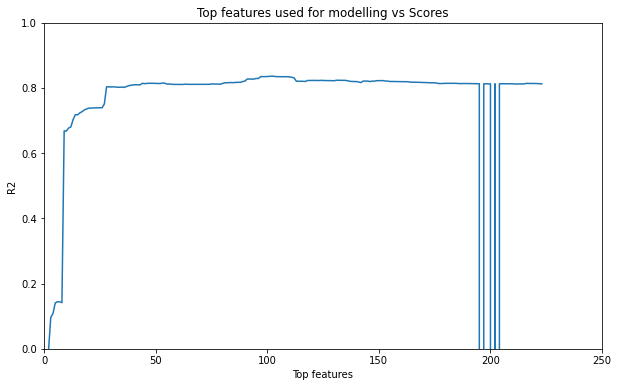

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(top_features, scores)
plt.title('Top features used for modelling vs Scores')
plt.xlim([0,250])
plt.ylim([0,1])
plt.xlabel('Top features')
plt.ylabel('R2')

ℹ️ From the graph above, we can see that the scores plateau when training a model on approximately the top 100 features. That is the performance/complexity tradeoff to go for.